In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import wooldridge  # wooldridgeのデータ・パッケージ
from statsmodels.formula.api import ols  # 回帰分析のパッケージ
from see import see  # 属性を調べるパッケージ

# from numba import njit  # シミュレーションの計算を高速化する
#'ImportError: Numba needs NumPy 1.24 or less'

ImportError: Numba needs NumPy 1.24 or less

In [2]:
wooldridge.data()

df = wooldridge.data("wage1")

  J.M. Wooldridge (2016) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

In [8]:
df.head()
wooldridge.data('wage1',description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [4]:
df2 = df.loc[:,["wage","educ"]]

df2.describe()

,wage,educ
count,526.000000,526.000000
mean,5.896103,12.562738
std,3.693086,2.769022
min,0.530000,0.000000
25%,3.330000,12.000000
50%,4.650000,12.000000
75%,6.880000,14.000000
max,24.980000,18.000000


In [5]:
mat_wage_educ = np.cov(df['wage'],df['educ'])
mat_wage_educ

cov_wage_educ = mat_wage_educ[0, 1]
cov_wage_educ

var_wage = df['wage'].var(ddof=1)
var_educ = df['educ'].var(ddof=1)
var_wage, var_educ

b1hat = cov_wage_educ / var_educ
b1hat

0.5413592546651745

In [7]:
from statsmodels.formula.api import ols

formula = 'wage ~ educ'
mod = ols(formula, data=df).fit()

print(mod.summary(slim=True))


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
No. Observations:                 526   F-statistic:                     103.4
Covariance Type:            nonrobust   Prob (F-statistic):           2.78e-22
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


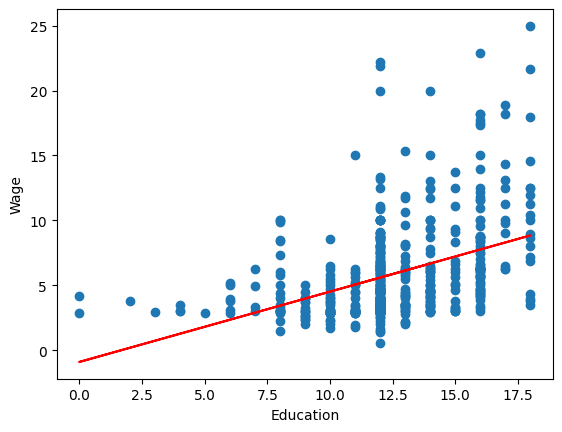

In [8]:
wage_hat = mod.fittedvalues

plt.scatter('educ', 'wage', data=df)
plt.plot(df['educ'],wage_hat, 'r')
plt.xlabel('Education')
plt.ylabel('Wage')
pass

In [9]:
res = mod

n = res.nobs
k = res.df_model
# n-k-1 = res.df_resid
SST = res.centered_tss
SSE = res.ess
SSR = res.ssr
決定係数 = res.rsquared
修正済み決定係数 = res.rsquared_adj

1-SSR/SST

res.rsquared
res.rsquared_adj

0.1631635367763874

In [10]:
df2['wage_log'] = np.log(df2['wage'])
formula = 'wage_log ~ educ'
res = ols(formula, data=df2).fit()

print(res.summary(slim=True))


                            OLS Regression Results                            
Dep. Variable:               wage_log   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
No. Observations:                 526   F-statistic:                     119.6
Covariance Type:            nonrobust   Prob (F-statistic):           3.27e-25
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wooldridge
# from numba import njit
from pandas.plotting import scatter_matrix
from scipy.stats import norm, uniform, gaussian_kde, multivariate_normal
from see import see
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [17]:
wage1 = wooldridge.data('wage1').loc[:,['wage', 'educ', 'tenure', 'exper']]


formula_1 = 'np.log(wage)~ educ + tenure + exper+I(exper**2)'

res_1 = ols(formula_1, data=wage1).fit()
print(res_1.summary(slim = True))

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
No. Observations:                 526   F-statistic:                     73.09
Covariance Type:            nonrobust   Prob (F-statistic):           3.81e-49
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1983      0.102      1.945      0.052      -0.002       0.399
educ              0.0853      0.007     11.873      0.000       0.071       0.099
tenure            0.0208      0.003      6.938      0.000       0.015       0.027
exper             0.0329      0.005      6.425      0.000       0.023       0.043
I(exper ** 2)    -0.0007      0.000     -5.945      0.000      -0.001      -0.000

Notes:
[1] Standard Errors ass

In [18]:
wm = wage1.mean()  # 変数の平均の計算

z = {'educ':wm['educ'],
     'tenure':wm['tenure'],
     'exper':wm['exper']}


res_1.predict(z)

0    1.744726
dtype: float64

In [16]:
educ_mean = wm['educ']
tenure_mean = wm['tenure']
exper_mean = wm['exper']

z2 = {'educ':[educ_mean-1, educ_mean, educ_mean+1],
                  'tenure':[tenure_mean]*3,
                  'exper':[exper_mean]*3}

educ_return = res_1.predict(z2)
educ_return

0    1.531239
1    1.623268
2    1.715297
dtype: float64

In [19]:
res_1.scale

0.18236284805478611

In [20]:
b0 = 1  # 定数項
b1 = 2  # x1の係数
b2 = 3  # x2の係数
n = 30  # 標本の大きさ

x1 = np.random.normal(loc=4.0, scale=2.0, size=n)  # (1)の説明

x2 = np.random.uniform(low=1.0, high= 10.0, size=n)  # (2)の説明

u = np.random.normal(loc=0, scale=1.0, size=n)  # (1)の説明

y = b0 + b1*x1 + b2*x2 + u

c = np.ones(n)  # (3)の説明

In [23]:
X = np.stack([c,x1,x2],axis=1)
X.shape

(30, 3)

In [24]:
bhat = np.linalg.inv((X.T)@X)@(X.T)@y
bhat

array([0.18483146, 1.9982035 , 3.10278443])

In [26]:
df_check = pd.DataFrame({'Y':y,'X1':x1,'X2':x2})
res_check = ols('Y ~ X1 + X2', data=df_check).fit()
res_check.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
No. Observations:                  30   F-statistic:                     507.7
Covariance Type:            nonrobust   Prob (F-statistic):           3.80e-22
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1848      0.909      0.203      0.840      -1.680       2.050
X1             1.9982      0.130     15.420      0.000       1.732       2.264
X2             3.1028      0.108     28.831      0.000       2.882       3.324
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
e = y.T-X@bhat.T
SSR = e@e.T
sigma_e2 = SSR/(n-1-2)

bvar = sigma_e2 * np.linalg.inv(X.T@X)

np.sqrt(bvar.diagonal())

array([0.90896191, 0.12958654, 0.10761871])

In [30]:
def sim_unbias(n, N, b0=1.0, b1=2.0, b2=3.0):

    # N個の0からなるarrayであり、0を推定値と置き換えて格納する
    b0hat_arr = np.zeros(N)
    b1hat_arr = np.zeros(N)
    b2hat_arr = np.zeros(N)
    
    c = np.ones(n)  # 定数項
    
    for i in range(N):  # N 回のループ
        
        # 標準正規分布
        u = np.random.normal(loc=0, scale=1.0, size=n)
        
        # 平均4.0,標準偏差2.0の正規分布
        x1 = np.random.normal(loc=4, scale=2.0, size=n)
        
        # [1,10)の一様分布。`low=`，`high=`を付け加えるとエラーが発生する。
        x2= np.random.uniform(1.0, 10.0, size=n)
        
        y = b0 + b1*x1 + b2*x2 + u  # 被説明変数の生成
        
        X = np.stack((c,x1,x2),axis=1)  # 説明変数の行列
        bhat = np.linalg.inv((X.T)@X)@(X.T)@y  # OLS推定
        
        b0hat_arr[i] = bhat[0]  # 上のarrayに推定値を代入する
        b1hat_arr[i] = bhat[1]
        b2hat_arr[i] = bhat[2]
        
    return b0hat_arr, b1hat_arr, b2hat_arr

In [32]:
b0hat, b1hat, b2hat = sim_unbias(n=30, N=100_000)

print('b0:', b0hat.mean(),
      '\nb1:', b1hat.mean(),
      '\nb1:', b2hat.mean())

b0: 1.0017221662372757 
b1: 2.000115776937979 
b1: 2.9998652281476503


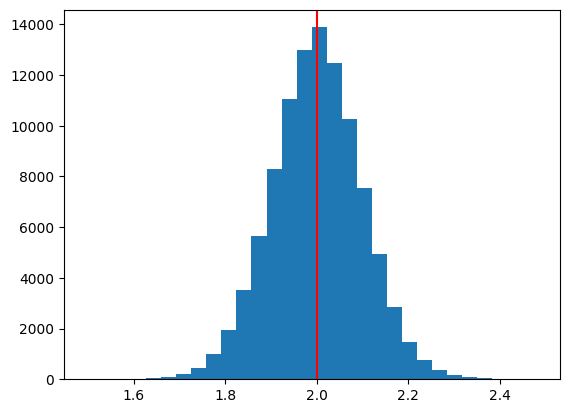

In [33]:
plt.hist(b1hat,bins=30)
plt.axvline(x=b1,color='red')
pass

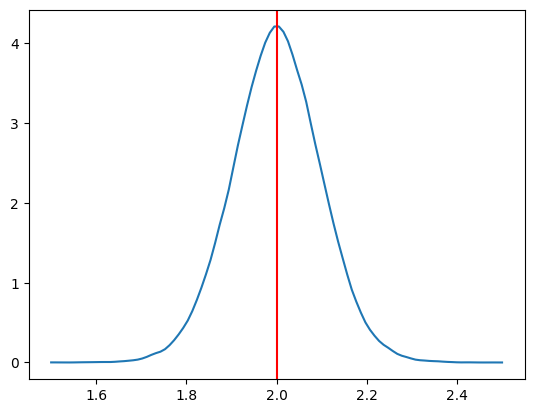

In [34]:
x=np.linspace(1.5,2.5,100)  # 図を作成するために1.5から2.5までの横軸の値を設定
kde_model=gaussian_kde(b1hat)  # カーネル密度推定を使いb1hatの分布を推定

plt.plot(x, kde_model(x))  # 誤差項の分布をプロット
plt.axvline(x=b1,color='red')  # 母集団のパラメータ
pass

シミュレーション：多重共線性
説明
多重共線性が高くなると，パラメータの推定値の正確性が低下する（即ち、パラメータの標準誤差

が大きくなる）。この点を確認するためにパラメータの分散の推定値にある

を利用する。これは 分散拡大因子（variance inflation factor） と呼ばれる。以下ではvifと呼ぶ。この値が１０以上になる説明変数どうしを使うと多重共線性の可能性が高いといわれる。

例として回帰分析res_1を考える。

In [36]:
wage1_vif = wage1.loc[:,['educ','tenure','exper']]

def my_vif(dataframe):
    mc = dataframe.corr().to_numpy()
    vif = np.linalg.inv(mc).diagonal()
    return pd.Series(vif_manual, index=dataframe.columns)

my_vif(wage1_vif)

educ      1.112771
tenure    1.349296
exper     1.477618
dtype: float64

In [37]:
def sim_multi(n, N, m, b0=1.0, b1=2.0, b2=3.0):  # n=標本の大きさ, N=標本数, m=共分散
    
    # ２つのx1,x2の共分散を設定
    rv_mean = [4, 1]  # x1, x2の平均
    # x1, x2の共分散行列
    rv_cov = [[1.0, m],    # 全ての変数の分散は１（対角成分）
              [m, 1.0]]  # Cov(x1,x2)=m
    
    # 推定値を入れる空のarray
    b0hat_arr = np.zeros(N)
    b1hat_arr = np.zeros(N)
    b2hat_arr = np.zeros(N)
    
    c = np.ones(n)  # 定数項
    
    for i in range(N):  # N 回のループ
        
        # x1, x2の値の抽出
        rv = multivariate_normal.rvs(rv_mean, rv_cov, size=n)  # x1, x2,をnセット抽出
        x1 = rv[:,0]  # 説明変数
        x2 = rv[:,1]  # 説明変数

        u = np.random.randn(n)  # 標準正規分布
        y = b0 + b1*x1 + b2*x2 + u  # 説明変数
        
        X = np.stack((c,x1,x2),axis=1)  # 説明変数の行列
        bhat = np.linalg.inv((X.T)@X)@(X.T)@y  # OLS推定
        
        b0hat_arr[i] = bhat[0]  # b0hat_arrへの追加
        b1hat_arr[i] = bhat[1]  # b1hat_arrへの追加
        b2hat_arr[i] = bhat[2]  # b2hat_arrへの追加

    return b0hat_arr, b1hat_arr, b2hat_arr # 返り値の設定

In [51]:
# 多重共線性が弱いケース 
b0hat_weak, b1hat_weak, b2hat_weak = sim_multi(100, 10_000, m=0.1)

# 多重共線性が強いケース 
b0hat_strong, b1hat_strong, b2hat_strong = sim_multi(100, 10_000, m=0.9)

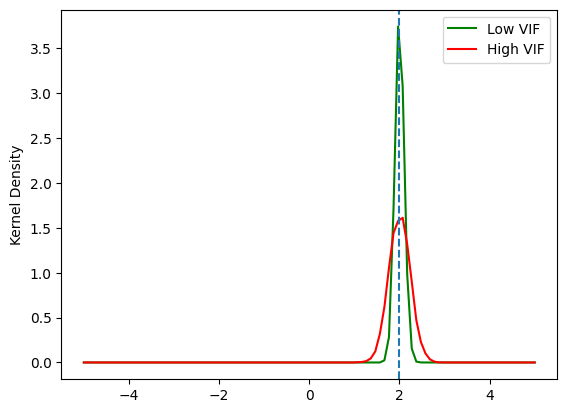

In [52]:
xx=np.linspace(-5,5,num=100)  # 図を作成するために横軸の値を設定

# 多重共線性が弱いケース
kde_model_weak=gaussian_kde(b1hat_weak)  # OLS推定量のカーネル密度関数を計算

# 多重共線性が強いケース
kde_model_strong=gaussian_kde(b1hat_strong)

plt.plot(xx, kde_model_weak(xx), 'g-', label='Low VIF')  # OLS推定量の分布プロット
plt.plot(xx, kde_model_strong(xx),'r-', label='High VIF')  # IV推定量の分布プロット
plt.axvline(x=b1,linestyle='dashed')
plt.ylabel('Kernel Density')  # 縦軸のラベル
plt.legend()  # 凡例
pass

/home/bunseki/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


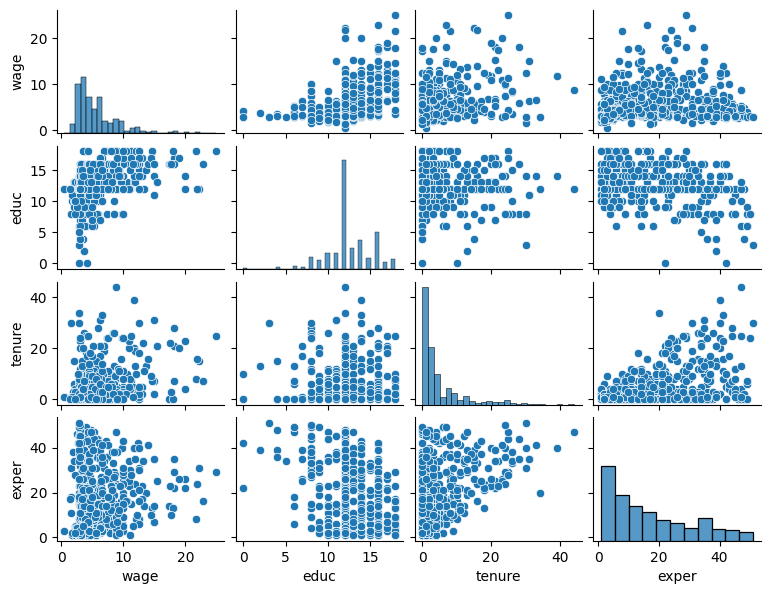

In [56]:
sns.pairplot(wage1, height=1.5, aspect=1.3)

<Axes: >

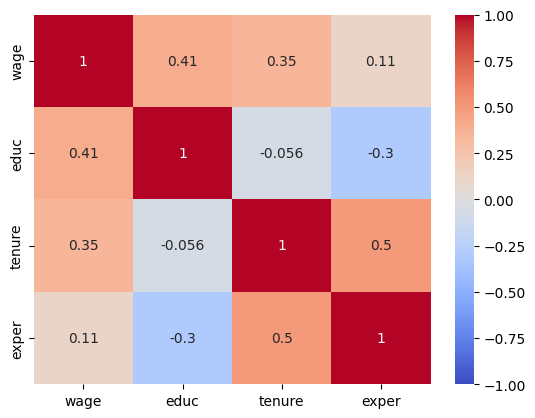

In [55]:
mat = wage1.corr()

sns.heatmap(mat, vmin=-1, annot=True, cmap='coolwarm')